# PDF Malware Prediction

### Group 21:
* Ganesh


In [1]:
!pip install scikit-plot

In [2]:
import numpy as np
import pandas as pd
!pip install scipy==1.8.1
!pip install scipy==1.7.3

!pip install imbalanced-learn
!pip install --upgrade scipy
#sets pandas dataframe max columns
from numpy import interp
pd.set_option('display.max_columns', None)
import re
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #for oversampling
from sklearn.feature_selection import RFE #for feature selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#import scikitplot as skplt #for plotting the results
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization

ERROR: Could not find a version that satisfies the requirement scipy==1.8.1 (from versions: none)
ERROR: No matching distribution found for scipy==1.8.1
ERROR: Could not find a version that satisfies the requirement scipy==1.7.3 (from versions: none)
ERROR: No matching distribution found for scipy==1.7.3


### Import DataFrame and Data Exploration

In [3]:
# from google.colab import files
# file = files.upload()
df = pd.read_csv('PDFMalware2022.csv',header=0)
print(df.shape)
print(list(df.columns))

(10026, 33)
['File name', 'pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class']


In [4]:
df.head(10)

,File name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,10.00,10.00,3.0,3.00,1.00,1.0,1.00,1.00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0.0,No,\t%PDF-1.6,19.00,19.00,9.0,9.00,1.00,1.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0.0,Yes,\t%PDF-1.3,12.00,12.00,3.0,3.00,1.00,1.0,1.00,2.00,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,14.00,14.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0.0,Yes,\t%PDF-1.3,15.00,15.00,4.0,4.00,1.00,1.0,1.00,3.00,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
5,b9d26b76b17fdbce1848e3c42a44e6b728aefeb34d2ba1...,14.0,224.0,0.0,20.0,7.0,0.0,0.0,0.0,No,\t%PDF-1.6,19.00,19.00,9.0,9.00,1.00,1.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,Malicious
6,600f63e6b331f4bdc6e2ae6587fc7b5f9e45abd774e266...,2048.0,291.0,1.0,27.0,3.0,0.0,0.0,0.0,No,\t%PDF-1.5,29.00,29.00,6.0,6.00,3.00,3.0,3.00,1.00,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
7,d2e3b1f66bd5ece83915462137e44b0a35f31122fd08e1...,6.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,14.00,14.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
8,f97cf17003a62df8eae1c74841777a6c10578718f72ee9...,2.0,256.0,1.0,15.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,14.00,14.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
9,afe8d2abf6807bb1b83affc20b8fcb424d75cb7ce340c9...,14.0,256.0,1.0,16.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.4,15.00,15.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious


In [5]:
df['Class'].unique()

array(['Malicious', nan, 'Benign'], dtype=object)

### Data Cleaning and Preprocessing

In [6]:
df = df.drop(df[df['Class'].isnull()].index.tolist(), axis=0)
df = df.drop(df[df['endobj'] == 'pdfid.py'].index.tolist(), axis=0)
df = df.fillna(0)

In [7]:
df = df.replace([-1, -1.00],0)

In [8]:
df["Class"] = np.where(df["Class"].str.contains("Malicious"), 1, 0)
df["text"] = np.where(df["text"].str.contains("Yes"), 1, 0)

In [ ]:
# @title Default title text
def header_obj(col):
  match = re.search('%PDF-\d*.?\d*', col)
  if match:
    return 1
  return 0

df['header'] = df['header'].apply(lambda col: header_obj(col))

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ganesh Chitturi\AppData\Local\Temp\ipykernel_5812\411402521.py:3: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('%PDF-\d*.?\d*', col)


### More Data Exploration

C:\Users\Ganesh Chitturi\AppData\Local\Temp\ipykernel_5812\101096754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data = df, palette='hls')


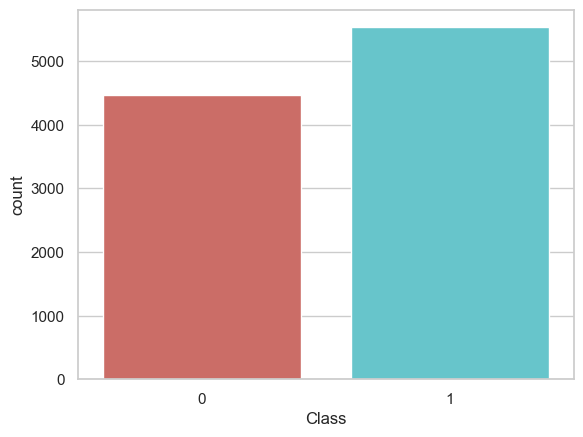

<Figure size 640x480 with 0 Axes>

In [10]:
sns.countplot(x='Class', data = df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
print('Percentage of Malicious vs Benign Classes')
df['Class'].value_counts()/len(df) * 100

Percentage of Malicious vs Benign Classes


Class
1    55.3334
0    44.6666
Name: count, dtype: float64

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns  # Select only numeric columns
df.groupby('Class')[numeric_cols].mean()  # Apply mean to numeric columns only


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,stream,trailer,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
Class,,,,,,,,,,,,,,,,,,,,,,,,,,
0,108.566473,318.296329,5.081916,238.195166,13.370859,0.009848,0.000448,4.227171,0.643688,0.992614,33.058639,1.553044,0.012086,3.100269,0.329902,0.381379,0.621531,0.055282,0.593330,0.090868,0.000000,0.000895,0.626902,0.001343,2.914727,0.0
1,69.796748,347.386811,2.101897,4768.472809,82.487805,0.008672,0.042276,0.664679,0.159530,0.908762,4.814092,1.023487,0.009214,0.341825,1.088528,1.439747,0.070822,0.525926,0.229088,0.005239,0.012285,0.023487,0.493767,0.096838,1.528275,1.0


### Data Visualization

In [13]:

# fig = px.scatter(x=df['pdfsize'], y=df['metadata size'], color=df['Class'],
#                  labels={'x':'PDF Size', 'y':'Metadata size', 'color':'Class'}, title='PDF Size vs Metadata size')
# fig.show()
!pip install nbformat --upgrade
import plotly.express as px
import plotly.io as pio

# Create the plot
fig = px.scatter(x=df['pdfsize'], y=df['metadata size'], color=df['Class'],
                 labels={'x': 'PDF Size', 'y': 'Metadata size', 'color': 'Class'}, 
                 title='PDF Size vs Metadata size')

# Show the plot in the browser to avoid the nbformat issue
pio.renderers.default = "browser"
fig.show()


In [14]:
img = df.images
imgs={'0':0,'1-5':0,'6-20':0,'21-50':0,'>50':0}
for i in img:
    if i == '1(1)':
        next
    elif int(i) == 0:
        imgs['0']+=1
    elif int(i)>0 and int(i)<6:
        imgs['1-5']+=1
    elif int(i)>5 and int(i)<21:
        imgs['6-20']+=1
    elif int(i)>20 and int(i)<51:
        imgs['21-50']+=1
    else:
        imgs['>50']+=1

imgs_df = pd.DataFrame(imgs.items())
imgs_df.columns=['Category','Count']

px.histogram(imgs_df, x='Category', y='Count', title='Images in PDF')

### Correlation Analysis

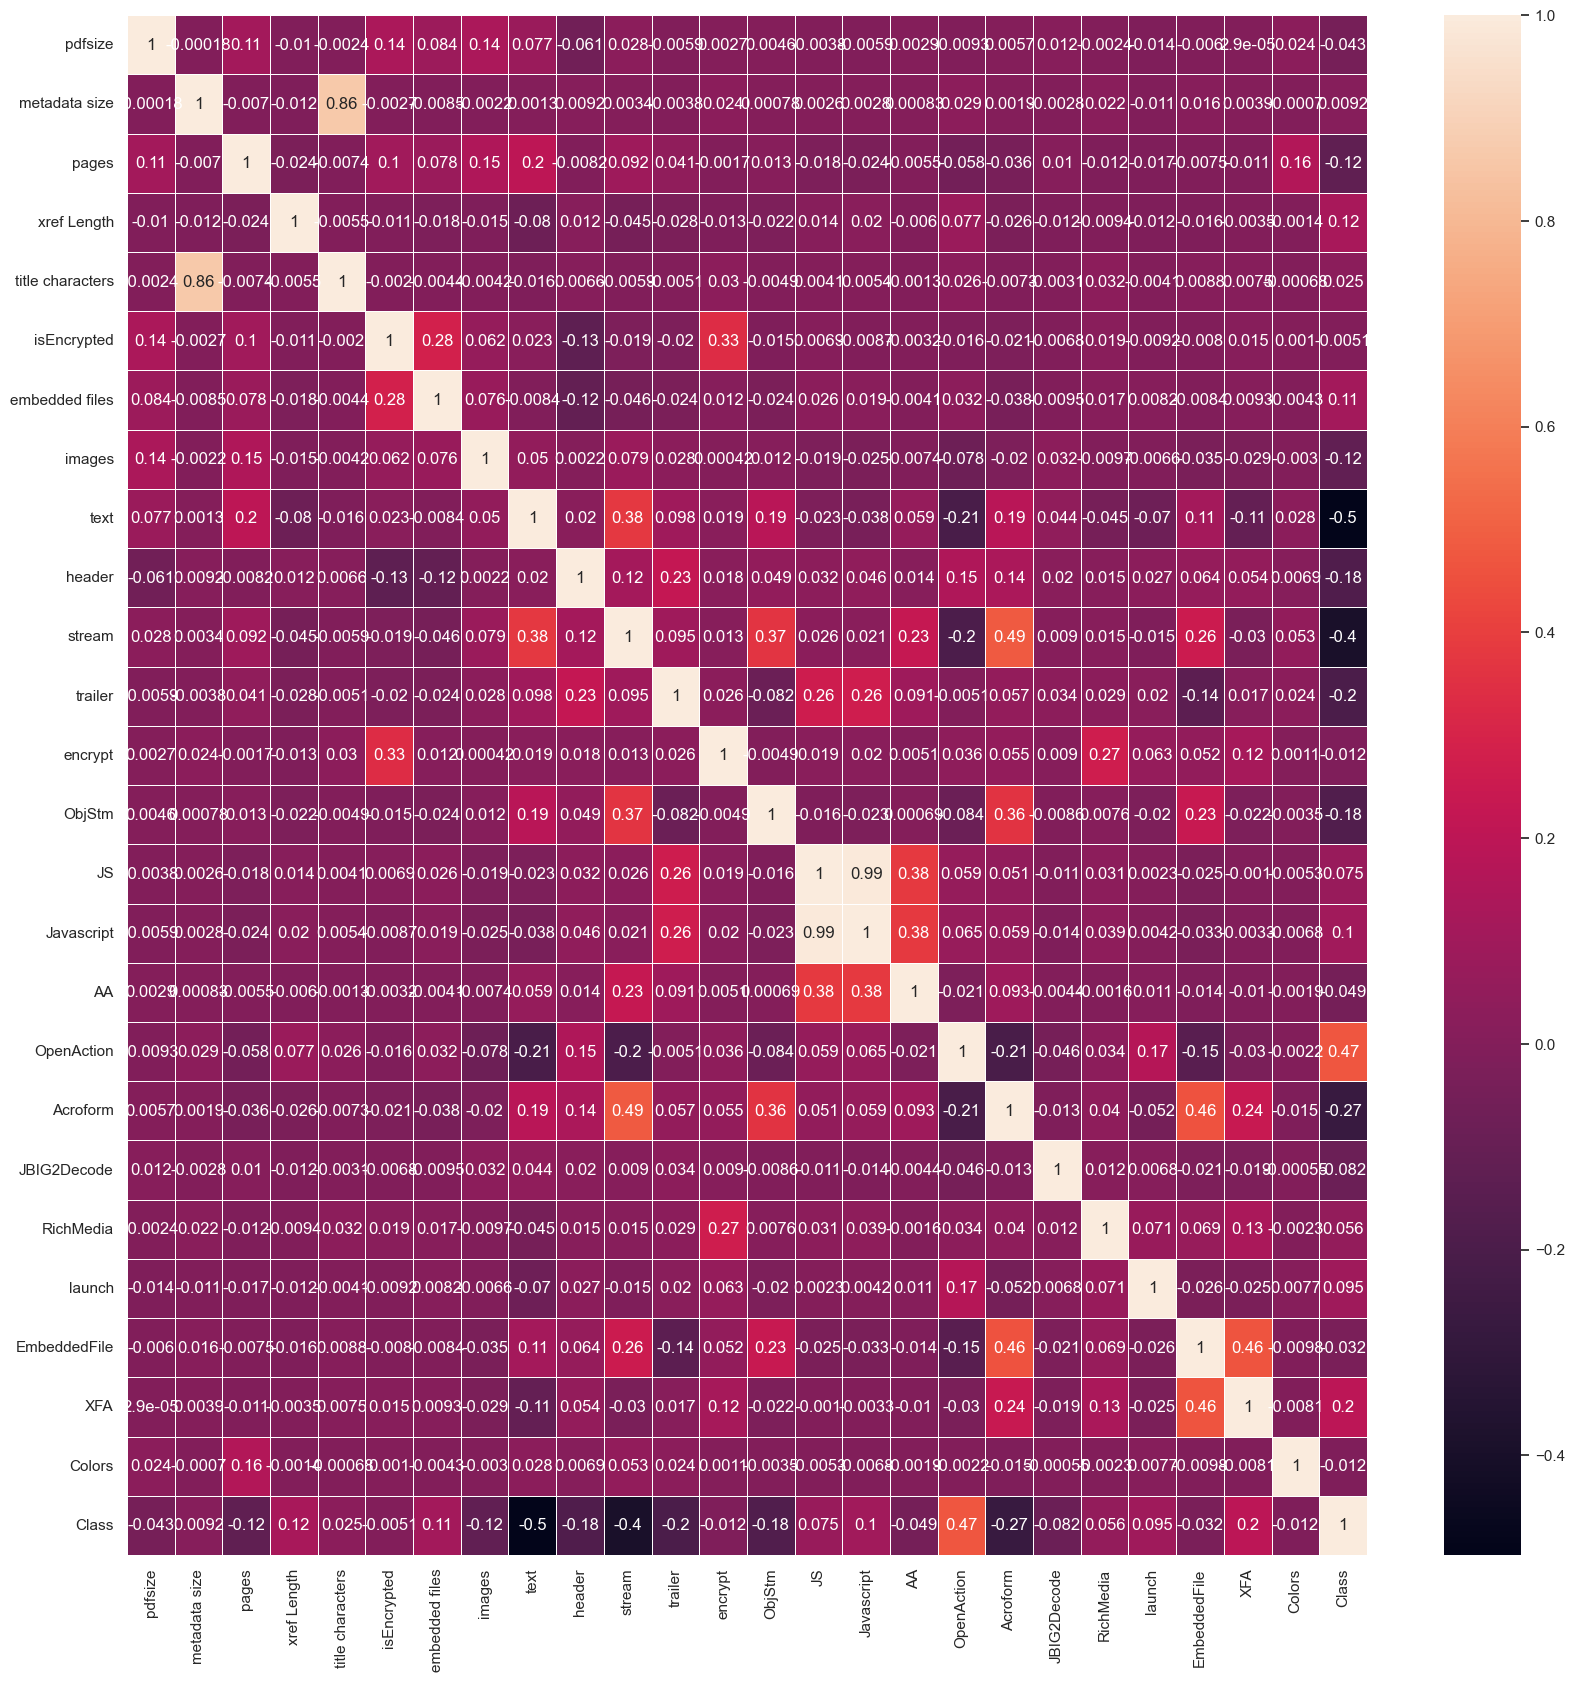

In [15]:
# f, ax = plt.subplots(figsize=(20, 20))
# fig = sns.heatmap(df.corr(), annot=True, linewidths=.5)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Create the heatmap using the correlation matrix of numerical columns
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.heatmap(corr_matrix, annot=True, linewidths=.5)

plt.show() # Add this line to display the plot

#### Removing highly correlated features

In [16]:
df = df.drop(['JS','title characters'], axis=1)

### Preparing data for model fitting

In [17]:
y = df['Class']
X = df.drop(['File name', 'Class'], axis=1)

#### Scaling data

In [18]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

#### Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = True)

### Comparing Multiple Models

#### Logistic Regression

In [20]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
print('Training Data Accuracy:',logreg.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, logreg.predict(X_test)))

Training Data Accuracy: 0.8441748866968808
Test Data Accuracy: 0.8272690923630548


c:\Users\Ganesh Chitturi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



#### KNearest Neighbors

In [21]:
knn = KNeighborsClassifier(n_neighbors=500, algorithm='brute')
knn.fit(X_train,y_train)
print('Training Data Accuracy:',knn.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, knn.predict(X_test)))

c:\Users\Ganesh Chitturi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Ganesh Chitturi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Ganesh Chitturi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ganesh Chitturi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, 

Training Data Accuracy: 0.8647027459344175
Test Data Accuracy: 0.8608556577369052


#### Support Vector Classifier

In [22]:
svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, svm.predict(X_test)))

Training Data Accuracy: 0.9996001066382298
Test Data Accuracy: 0.8848460615753698


### Base Model Preformance Evaluation

In [23]:

predicted_opt_proba = svm.predict_proba(X_test)

c:\Users\Ganesh Chitturi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



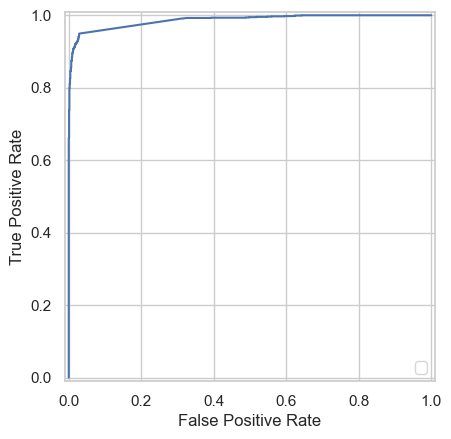

In [24]:
# skplt.metrics.plot_roc(y_test, predicted_opt_proba, figsize=(12,10))
# skplt.metrics.plot_roc(y_test, predicted_opt_proba, figsize=(12,10))
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, predicted_opt_proba[:, 1]) # Assuming binary classification
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

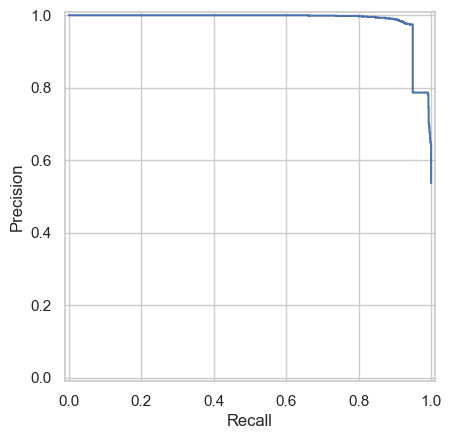

In [25]:
# plt.plot_precision_recall(y_test, predicted_opt_proba, figsize=(12,10))
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted_opt_proba[:, 1])

# Plot the Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

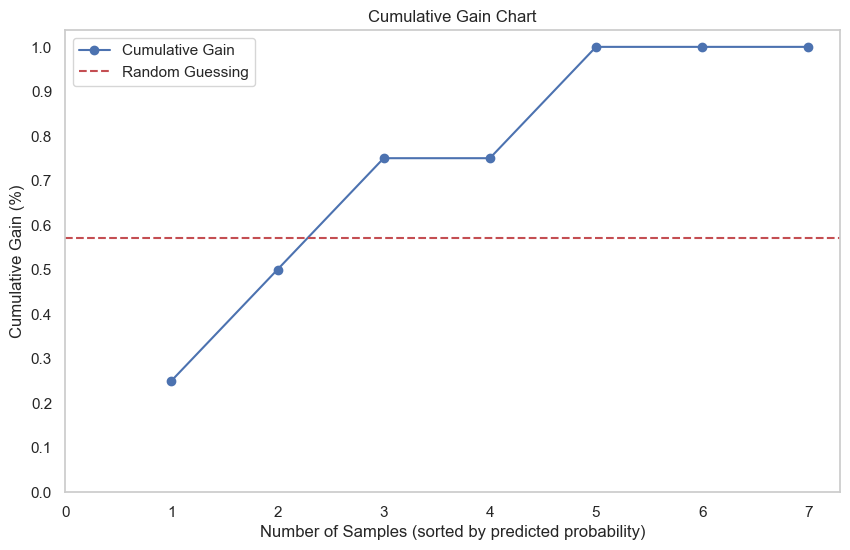

In [26]:
#  plt.plot_cumulative_gain(y_test, predicted_opt_proba, figsize=(10,6))
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual y_test and predicted_opt_proba)
# y_test: true labels, predicted_opt_proba: predicted probabilities
y_test = np.array([0, 0, 1, 1, 1, 0, 1])  # Example true labels
predicted_opt_proba = np.array([0.1, 0.4, 0.35, 0.8, 0.6, 0.05, 0.9])  # Example predicted probabilities

# Step 1: Combine true labels and predicted probabilities, and sort them
data = np.array(list(zip(y_test, predicted_opt_proba)))
sorted_data = data[np.argsort(data[:, 1])[::-1]]  # Sort by predicted probabilities (descending)

# Step 2: Calculate cumulative gain
cumulative_gain = np.cumsum(sorted_data[:, 0])  # Cumulative sum of true positives
total_positives = cumulative_gain[-1]  # Total number of positives in the dataset
cumulative_gain_percentage = cumulative_gain / total_positives  # Normalize

# Step 3: Calculate x-axis for plot (number of samples)
x_values = np.arange(1, len(sorted_data) + 1)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, cumulative_gain_percentage, marker='o', label='Cumulative Gain')
plt.axhline(y=total_positives / len(y_test), color='r', linestyle='--', label='Random Guessing')
plt.title('Cumulative Gain Chart')
plt.xlabel('Number of Samples (sorted by predicted probability)')
plt.ylabel('Cumulative Gain (%)')
plt.xticks(np.arange(0, len(sorted_data)+1, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid()
plt.legend()
plt.show()


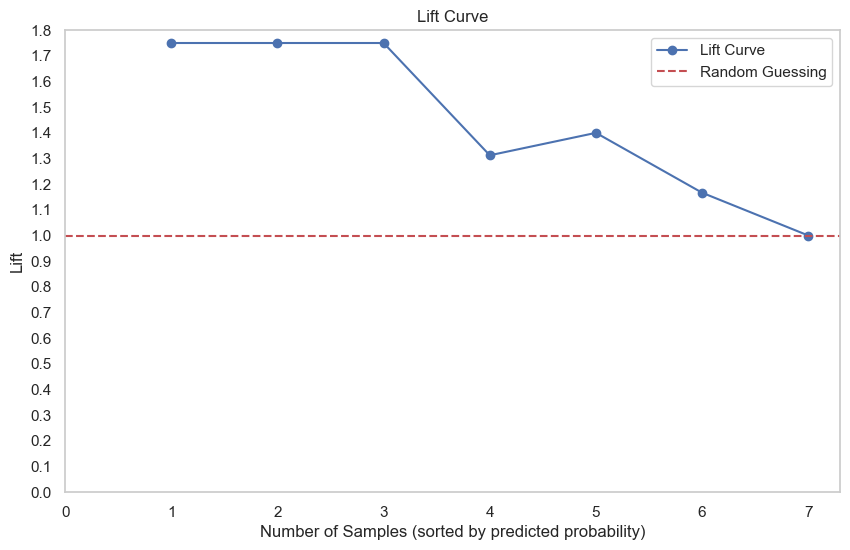

In [27]:
# skplt.metrics.plot_lift_curve(y_test, predicted_opt_proba, figsize=(10,6))
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual y_test and predicted_opt_proba)
y_test = np.array([0, 0, 1, 1, 1, 0, 1])  # Example true labels
predicted_opt_proba = np.array([0.1, 0.4, 0.35, 0.8, 0.6, 0.05, 0.9])  # Example predicted probabilities

# Step 1: Combine true labels and predicted probabilities, and sort them
data = np.array(list(zip(y_test, predicted_opt_proba)))
sorted_data = data[np.argsort(data[:, 1])[::-1]]  # Sort by predicted probabilities (descending)

# Step 2: Calculate cumulative positives and total positives
cumulative_positives = np.cumsum(sorted_data[:, 0])  # Cumulative sum of true positives
total_positives = cumulative_positives[-1]  # Total number of positives
total_samples = len(y_test)

# Step 3: Calculate lift
lift = cumulative_positives / (np.arange(1, total_samples + 1) * (total_positives / total_samples))

# Step 4: Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, total_samples + 1), lift, marker='o', label='Lift Curve')
plt.axhline(y=1, color='r', linestyle='--', label='Random Guessing')
plt.title('Lift Curve')
plt.xlabel('Number of Samples (sorted by predicted probability)')
plt.ylabel('Lift')
plt.xticks(np.arange(0, total_samples + 1, step=1))
plt.yticks(np.arange(0, max(lift) + 0.1, step=0.1))
plt.grid()
plt.legend()
plt.show()


### Oversampling

In [28]:
os = SMOTE(random_state=0)
columns = X.columns

os_X,os_y = os.fit_resample(X, y)
os_X = pd.DataFrame(data=os_X,columns=columns )
os_y= pd.DataFrame(data=os_y,columns=['Class'])

In [29]:
os_X.head()

,pdfsize,metadata size,pages,xref Length,isEncrypted,embedded files,images,text,header,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,1,10.0,10.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,224.0,0.0,20.0,0.0,0.0,0.0,0,1,19.0,19.0,9.0,9.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0
2,4.0,468.0,2.0,13.0,0.0,0.0,0.0,1,1,12.0,12.0,3.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,1,14.0,14.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,252.0,3.0,16.0,0.0,0.0,0.0,1,1,15.0,15.0,4.0,4.0,1.0,1.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print("Length of oversampled data is ",len(os_X))
print("Number of benign class in oversampled data",len(os_y[os_y['Class']==0]))
print("Number of malicious class in oversampled data",len(os_y[os_y['Class']==1]))
print("Proportion of benign class in oversampled data is ",len(os_y[os_y['Class']==0])/len(os_X))
print("Proportion of malicious class in oversampled data is ",len(os_y[os_y['Class']==1])/len(os_X))

Length of oversampled data is  11070
Number of benign class in oversampled data 5535
Number of malicious class in oversampled data 5535
Proportion of benign class in oversampled data is  0.5
Proportion of malicious class in oversampled data is  0.5


In [31]:
scaler = StandardScaler().fit(os_X)
os_X_scaled = pd.DataFrame(scaler.transform(os_X), columns=os_X.columns)

### Feature Selection

In [32]:
estimator = SVC(kernel="linear")
rfe = RFE(estimator, n_features_to_select=20)
rfe = rfe.fit(os_X_scaled, os_y.values.ravel())
cols_to_keep = rfe.support_

In [33]:
for i in range(len(os_X.columns)):
    print(f'Column: {os_X.columns[i]}, Selected: {rfe.support_[i]}')

Column: pdfsize, Selected: True
Column: metadata size, Selected: False
Column: pages, Selected: False
Column: xref Length, Selected: True
Column: isEncrypted, Selected: False
Column: embedded files, Selected: True
Column: images, Selected: True
Column: text, Selected: True
Column: header, Selected: False
Column: obj, Selected: True
Column: endobj, Selected: False
Column: stream, Selected: True
Column: endstream, Selected: True
Column: xref, Selected: True
Column: trailer, Selected: True
Column: startxref, Selected: False
Column: pageno, Selected: True
Column: encrypt, Selected: False
Column: ObjStm, Selected: True
Column: Javascript, Selected: True
Column: AA, Selected: True
Column: OpenAction, Selected: True
Column: Acroform, Selected: False
Column: JBIG2Decode, Selected: False
Column: RichMedia, Selected: True
Column: launch, Selected: True
Column: EmbeddedFile, Selected: True
Column: XFA, Selected: True
Column: Colors, Selected: True


In [34]:
cols = np.array(os_X.columns)[np.array(cols_to_keep)]

In [35]:
X = os_X_scaled[cols]
y = os_y['Class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = True)

### SVM with Feature Selection

In [37]:
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
predicted = svm.predict(X_test)
print('Test Data Accuracy:',metrics.accuracy_score(y_test, predicted))
predicted_proba = svm.predict_proba(X_test)

Training Data Accuracy: 0.9592869188147435
Test Data Accuracy: 0.9573699421965318


### Grid Search CV

In [38]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.958 total time=   0.8s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.960 total time=   0.7s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.958 total time=   0.7s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.957 total time=   0.8s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.960 total time=   0.7s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.952 total time=   0.3s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.954 total time=   0.4s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.955 total time=   0.2s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.954 total time=   0.3s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.954 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.957 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [39]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

### SVM with Optimal Hyperparameters

In [40]:
svm = SVC(C=10, kernel="rbf", gamma='auto', probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
predicted_optimal = svm.predict(X_test)
print('Test Data Accuracy:',metrics.accuracy_score(y_test, predicted_optimal))

Training Data Accuracy: 0.9795230065044568
Test Data Accuracy: 0.9725433526011561


### Final Model Performance Evaluation

In [41]:
print('Accuracy score for test set',metrics.accuracy_score(y_test, predicted_optimal))

Accuracy score for test set 0.9725433526011561


In [42]:
print(metrics.classification_report(y_test, predicted_optimal))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1405
           1       0.98      0.96      0.97      1363

    accuracy                           0.97      2768
   macro avg       0.97      0.97      0.97      2768
weighted avg       0.97      0.97      0.97      2768



In [43]:
predicted_opt_proba = svm.predict_proba(X_test)

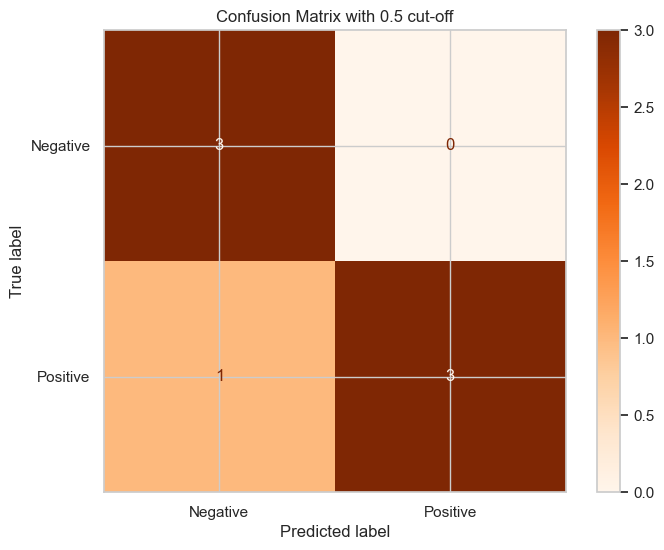

In [44]:
# skplt.metrics.plot_confusion_matrix(y_test, predicted_optimal,
#                                     title="Confusion Matrix with 0.5 cut-off",
#                                     cmap="Oranges")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample data (replace these with your actual y_test and predicted_optimal)
y_test = np.array([0, 1, 0, 1, 1, 0, 1])  # Example true labels
predicted_optimal = np.array([0, 1, 0, 1, 0, 0, 1])  # Example predicted labels

# Step 1: Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_optimal)

# Step 2: Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Step 3: Plotting
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges', ax=plt.gca())  # Use the current axis for plotting
plt.title("Confusion Matrix with 0.5 cut-off")
plt.show()


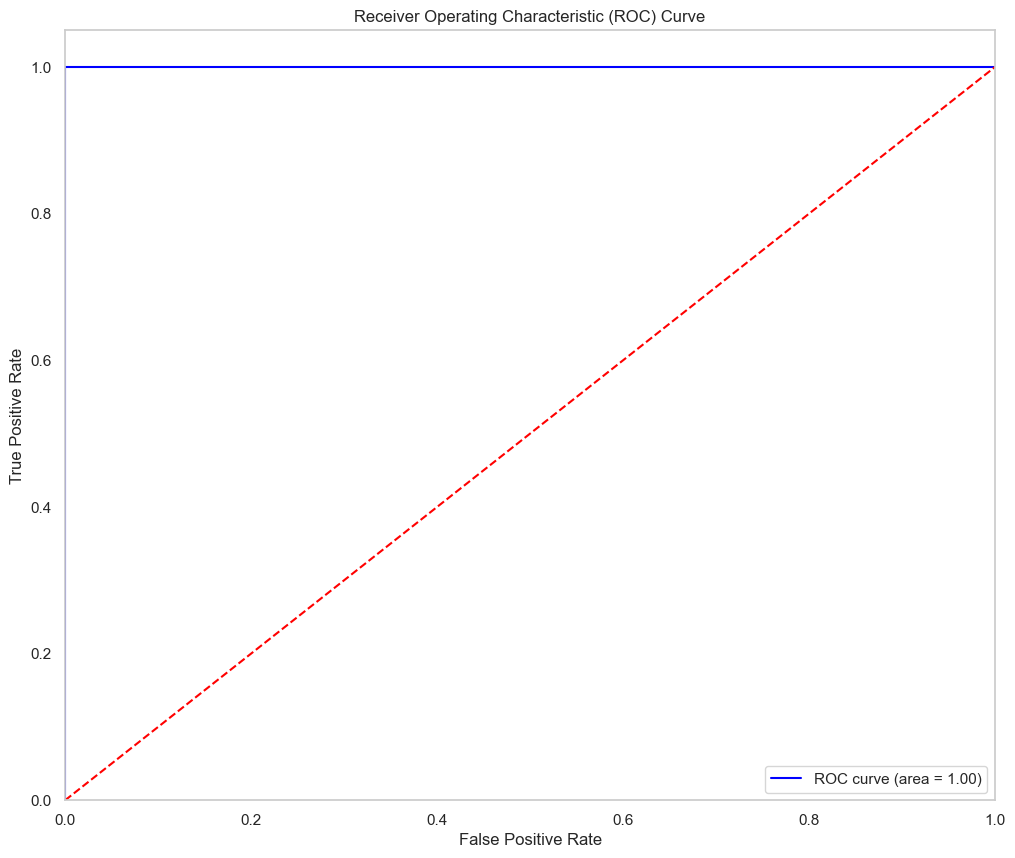

In [45]:
# skplt.metrics.plot_roc(y_test, predicted_opt_proba, figsize=(12,10))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample data (replace these with your actual y_test and predicted_opt_proba)
y_test = np.array([0, 1, 0, 1, 1, 0, 1])  # Example true labels
predicted_opt_proba = np.array([0.1, 0.9, 0.4, 0.8, 0.6, 0.3, 0.95])  # Example predicted probabilities

# Step 1: Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_opt_proba)

# Step 2: Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Step 3: Plotting
plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


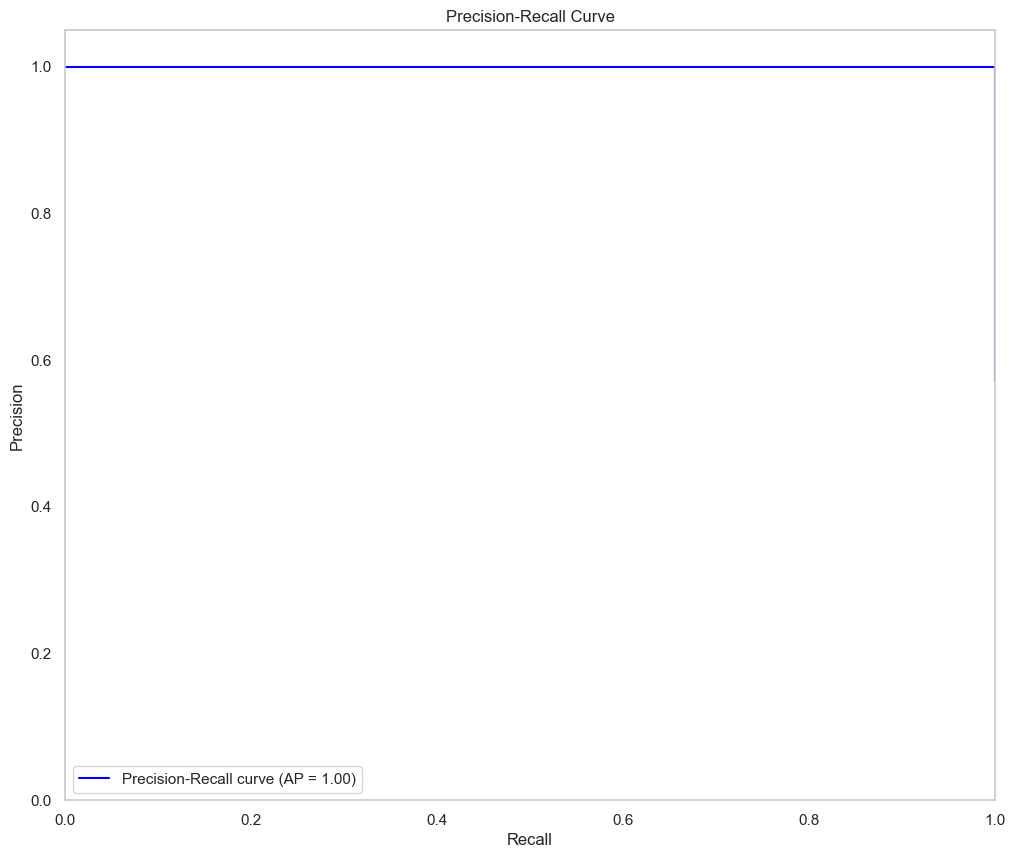

In [46]:
# skplt.metrics.plot_precision_recall(y_test, predicted_opt_proba, figsize=(12,10))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Sample data (replace these with your actual y_test and predicted_opt_proba)
y_test = np.array([0, 1, 0, 1, 1, 0, 1])  # Example true labels
predicted_opt_proba = np.array([0.1, 0.9, 0.4, 0.8, 0.6, 0.3, 0.95])  # Example predicted probabilities

# Step 1: Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, predicted_opt_proba)

# Step 2: Calculate average precision score
average_precision = average_precision_score(y_test, predicted_opt_proba)

# Step 3: Plotting
plt.figure(figsize=(12, 10))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = %.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc='lower left')
plt.show()


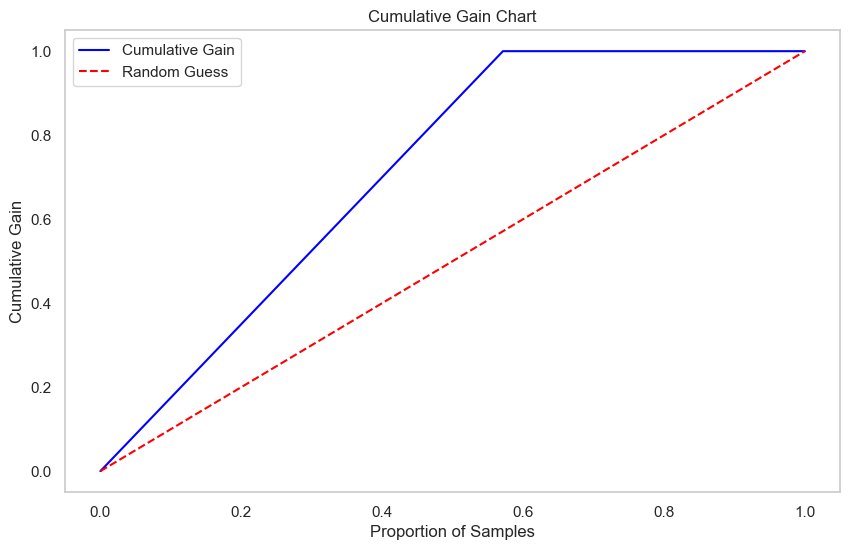

In [47]:
# skplt.metrics.plot_cumulative_gain(y_test, predicted_opt_proba, figsize=(10,6))
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual y_test and predicted_opt_proba)
y_test = np.array([0, 1, 0, 1, 1, 0, 1])  # Example true labels
predicted_opt_proba = np.array([0.1, 0.9, 0.4, 0.8, 0.6, 0.3, 0.95])  # Example predicted probabilities

# Step 1: Combine true labels and predicted probabilities into a DataFrame
data = np.vstack((y_test, predicted_opt_proba)).T
data = data[data[:, 1].argsort()[::-1] ]  # Sort by predicted probabilities (descending)

# Step 2: Calculate cumulative gains
cumulative_gains = np.cumsum(data[:, 0]) / np.sum(data[:, 0])  # Cumulative gain for the positive class
cumulative_gains = np.insert(cumulative_gains, 0, 0)  # Insert 0 at the beginning

# Step 3: Calculate the proportion of total cases for the x-axis
total_cases = len(y_test)
x_axis = np.arange(len(cumulative_gains)) / total_cases  # Normalized x-axis

# Step 4: Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_axis, cumulative_gains, color='blue', label='Cumulative Gain')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')  # Diagonal line
plt.xlabel('Proportion of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Chart')
plt.legend()
plt.grid()
plt.show()


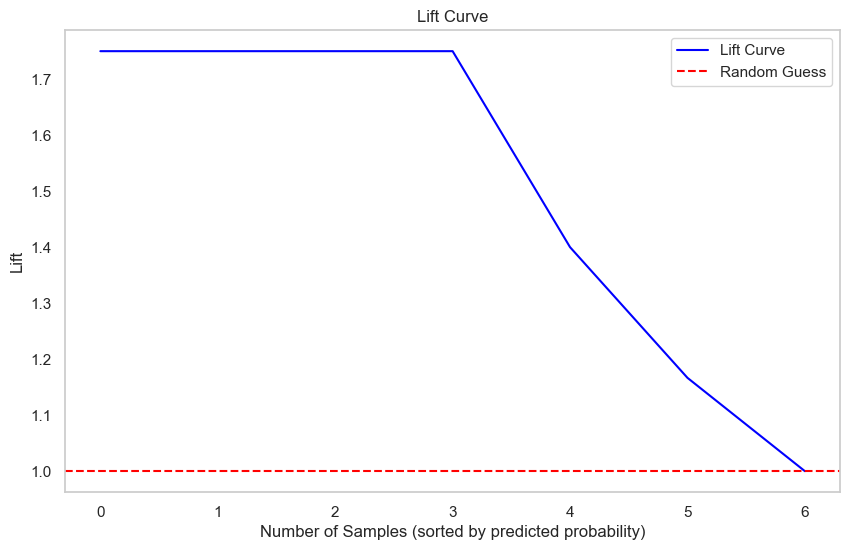

In [48]:
# skplt.metrics.plot_lift_curve(y_test, predicted_opt_proba, figsize=(10,6))
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual y_test and predicted_opt_proba)
y_test = np.array([0, 1, 0, 1, 1, 0, 1])  # Example true labels
predicted_opt_proba = np.array([0.1, 0.9, 0.4, 0.8, 0.6, 0.3, 0.95])  # Example predicted probabilities

# Step 1: Combine true labels and predicted probabilities into a DataFrame
data = np.vstack((y_test, predicted_opt_proba)).T
data = data[data[:, 1].argsort()[::-1]]  # Sort by predicted probabilities (descending)

# Step 2: Calculate lift
total_positive = np.sum(y_test)
total_samples = len(y_test)

# Calculate cumulative positives
cumulative_positives = np.cumsum(data[:, 0])
lift = cumulative_positives / (np.arange(1, total_samples + 1) * (total_positive / total_samples))

# Step 3: Plotting
plt.figure(figsize=(10, 6))
plt.plot(lift, color='blue', label='Lift Curve')
plt.axhline(y=1, color='red', linestyle='--', label='Random Guess')  # Lift of 1 represents random guessing
plt.xlabel('Number of Samples (sorted by predicted probability)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.grid()
plt.show()


In [49]:
!jupyter nbconvert --execute --to html Group21_Project.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot trust

Jupyter command `jupyter-nbconvert` not found.
